In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [17]:
df = pd.read_excel("C:/Users/o38528/Desktop/Analytics/HRAnalytics.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [19]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [20]:
df[['sales', 'salary']].describe().T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [21]:
(df.salary.value_counts()/len(df.salary))*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

Only around 8% of employees are in high income bracket. Majority are in low and medium income brackets

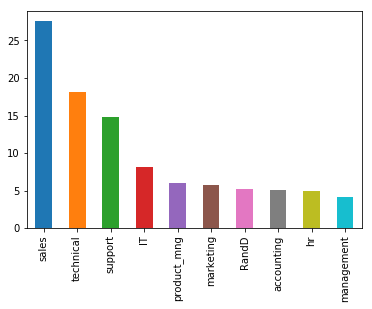

In [22]:
((df.sales.value_counts()/len(df.sales))*100).plot(kind='bar')

Majority are in Sales, Technical and Support

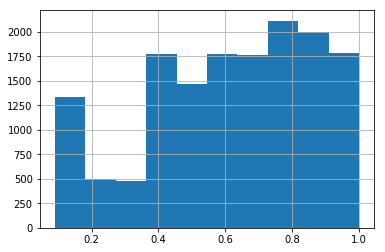

In [23]:
df.satisfaction_level.hist()

Distribution of scores across different satisfaction levels

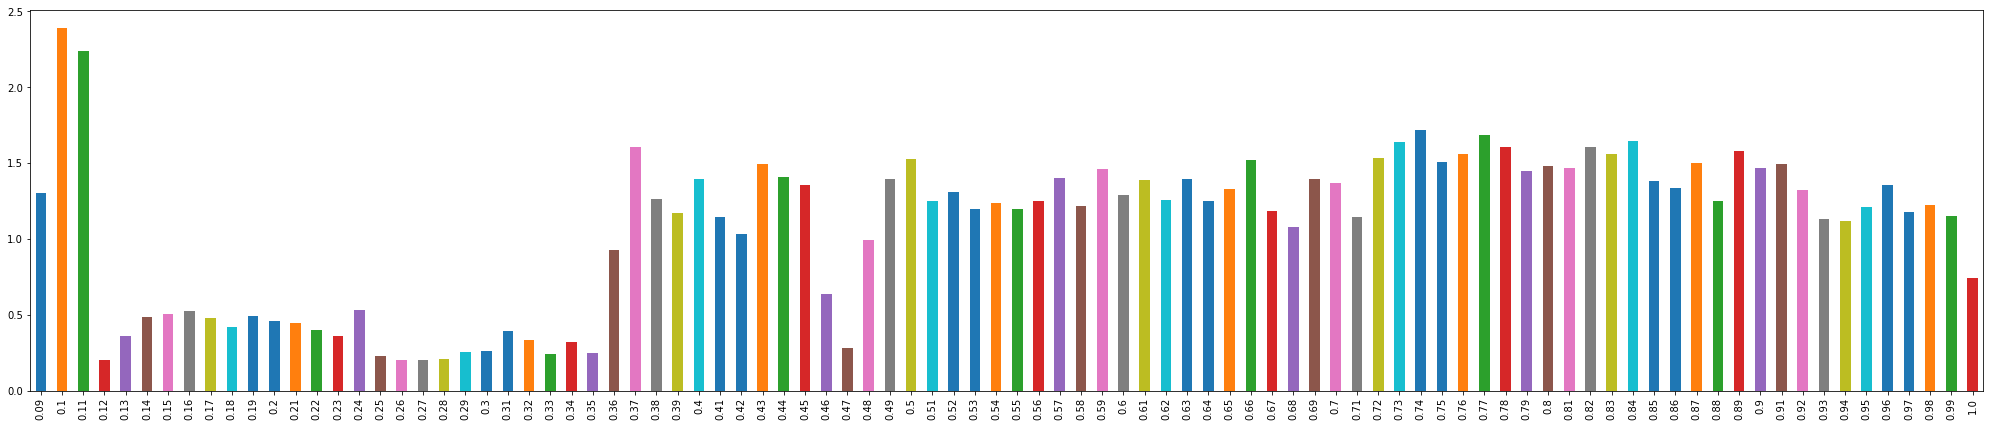

In [24]:
plt.figure(figsize=(35,7))
((df.satisfaction_level.value_counts().sort_index()/len(df.satisfaction_level))*100).plot(kind='bar')

Satisfaction level distribution is some what consistant from 0.5 onwards.
Nearly 2.4% of employees gave a score of 0.1 and are the leading group

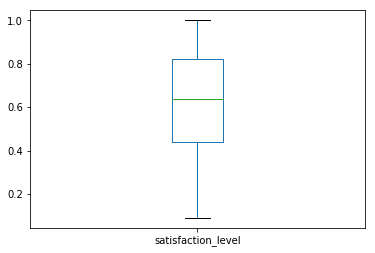

In [25]:
df.satisfaction_level.plot(kind='box')

In [26]:
df.satisfaction_level.mean()

0.6128335222348166

In [27]:
df.left.value_counts()/len(df.left)

0    0.761917
1    0.238083
Name: left, dtype: float64

Only 24% of the data represents the employees who have left the company, the data is not balanced so we should be careful while interpreting the accuracy of the predictive models

We will plot the distribution of employee satisfaction level again but this time will colour code the bars based on whether they have left the company or not

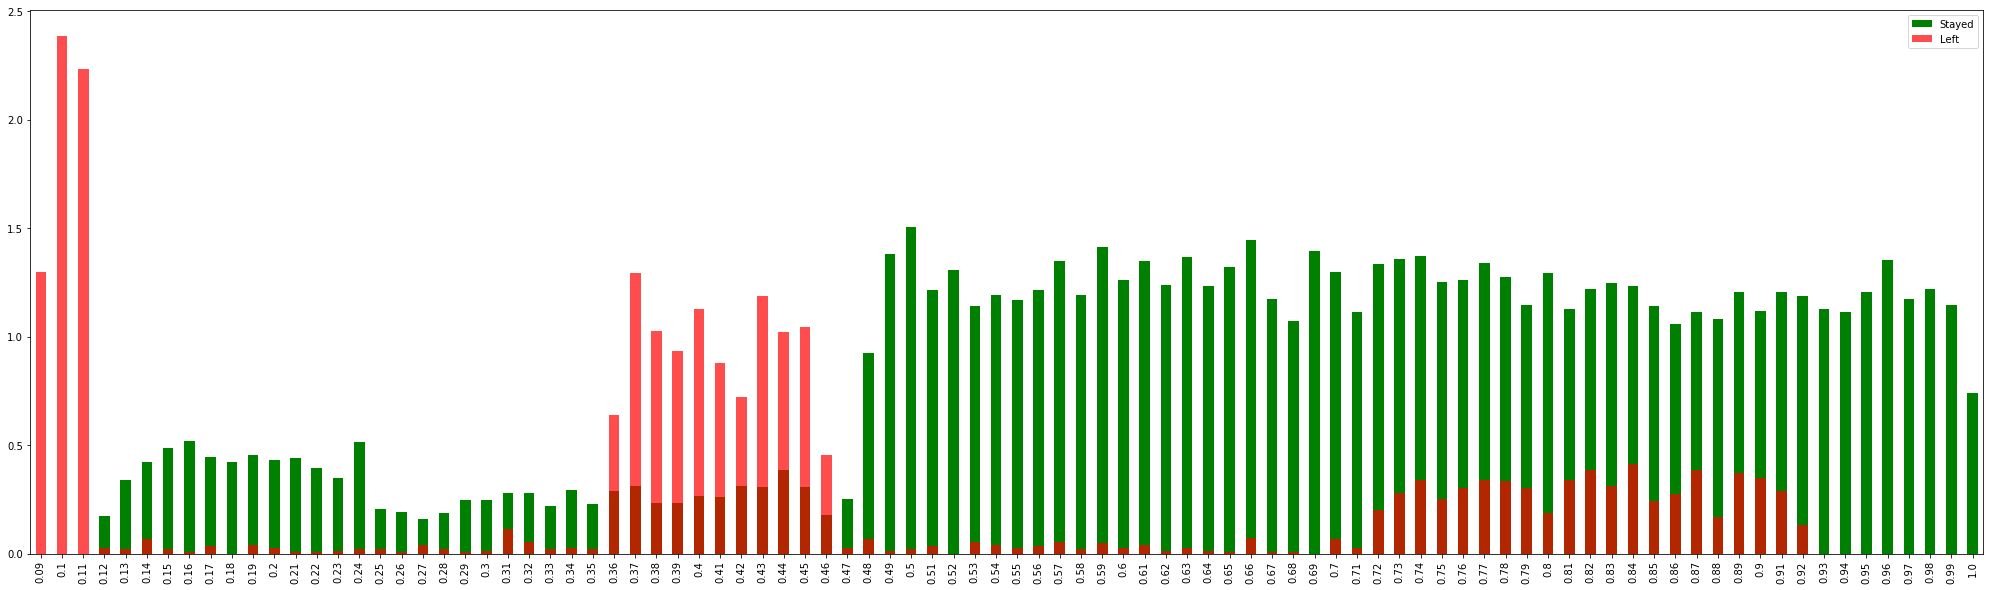

In [28]:
df.satisfaction_level = df.satisfaction_level.astype('category')
ax = pd.Series((df[df.left==0].satisfaction_level.value_counts()/len(df.left))*100).sort_index().plot(kind='bar',color='g',figsize=(35,10))
pd.Series((df[df.left==1].satisfaction_level.value_counts()/len(df.left))*100).sort_index().plot(kind='bar',color='r',alpha= 0.7,figsize=(35,10), ax=ax)
ax.legend(["Stayed", "Left"])

All the employees who voted below 0.12 have left the company, no surprise there, but majority of employees who voted 0.12 to 0.35 have stayed on while who have voted 0.36 - 0.46 have left. Leaving percentage is consistently low afterward, till 0.71. None of the employees who voted beyond 0.93 have left the company. The relation is obviously not linear; Logistic Regression might perform poorly here unless we include some polynomial degrees.

Distribution of employees based on salary

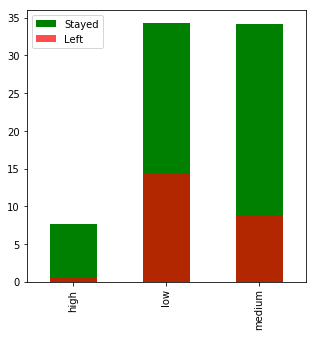

In [29]:
plt.figure(figsize=(5,5))
ax = ((df[df.left==0].salary.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g')
((df[df.left==1].salary.value_counts().sort_index()/len(df.left)*100)).plot(kind='bar',color='r',alpha= 0.7, ax= ax)
ax.legend(["Stayed", "Left"])

There is no surprise here, low and medium income employees have a tendency to leave compared to high earners

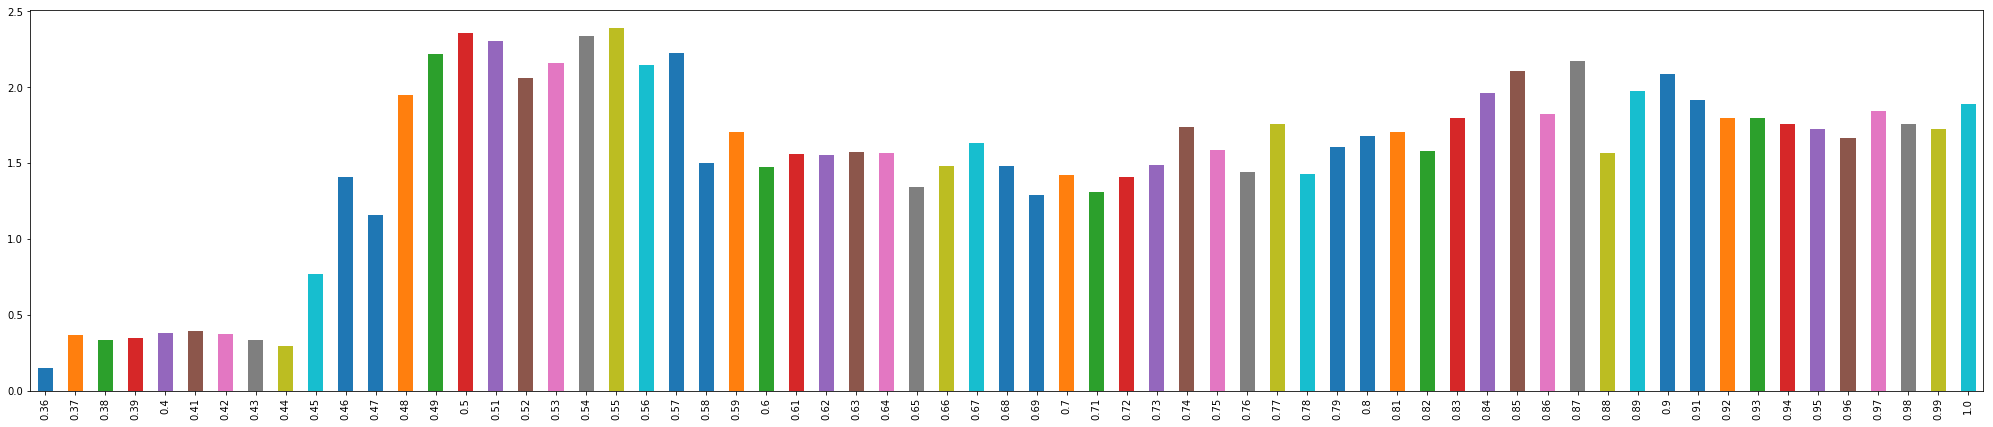

In [30]:
plt.figure(figsize=(35,7))
((df.last_evaluation.value_counts().sort_index()/len(df.last_evaluation))*100).plot(kind='bar')

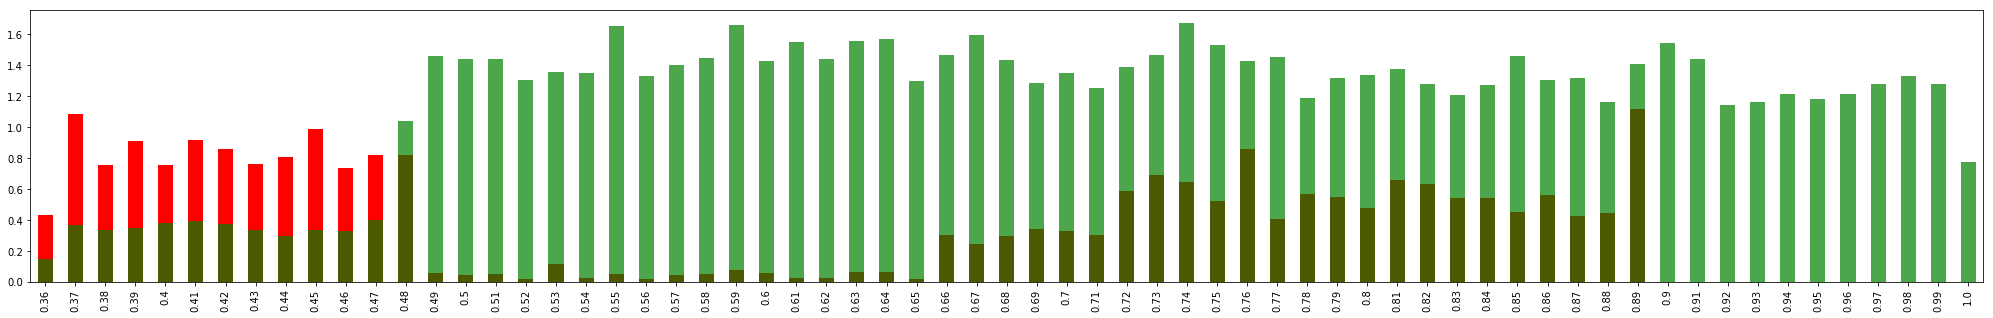

In [31]:
plt.figure(figsize=(35,5))
((df[df.left==1].last_evaluation.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].last_evaluation.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.7)

Majority of the employees who were evaluated 0.47 or below have left. From 0.49 to 0.65, the percentage is consistently low, it then picks up from 0.66 onwards reaching to a maximum at 0.89 but fluctuates a lot in between then drops to 0 at 0.9 and stays at 0 there onwards

Distribution of employees based on number of projects they have worked

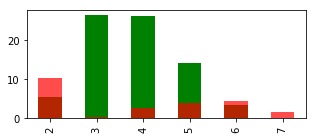

In [32]:
plt.figure(figsize=(5,2))
((df[df.left==0].number_project.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g')
((df[df.left==1].number_project.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r',alpha=0.7)

Employees who have worked on less than three or more than 5 projects have a high tendency to leave

We will plot a few more distributions

Distribution of employees based on average monthly hours spent at company

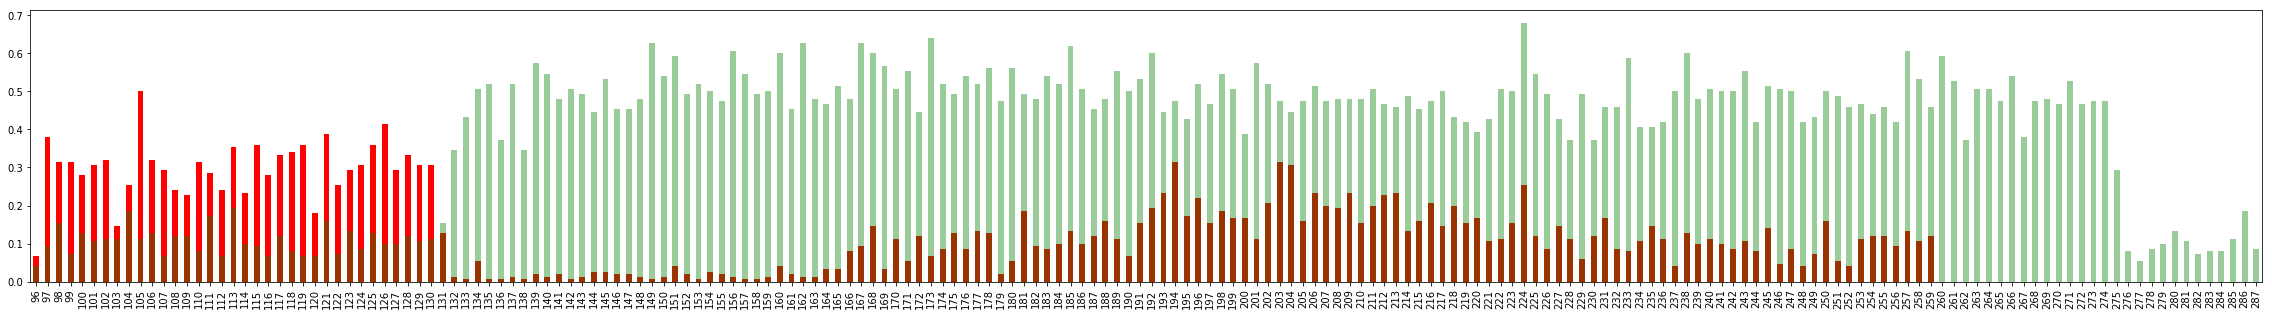

In [33]:
plt.figure(figsize=(40,5))
((df[df.left==1].average_montly_hours.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].average_montly_hours.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

Time Spent

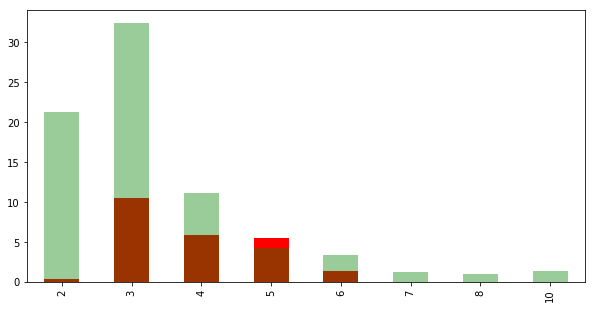

In [34]:
plt.figure(figsize=(10,5))
((df[df.left==1].time_spend_company.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='r')
((df[df.left==0].time_spend_company.value_counts().sort_index()/len(df.left))*100).plot(kind='bar',color='g',alpha=0.4)

In [35]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [36]:
lkup = {"low": 0, "medium": 1, "high": 2}
df['sal_num'] = df['salary'].map(lkup)

In [37]:
df.drop('salary', inplace=True, axis=1)

In [38]:
df.sal_num.value_counts()

0    7316
1    6446
2    1237
Name: sal_num, dtype: int64

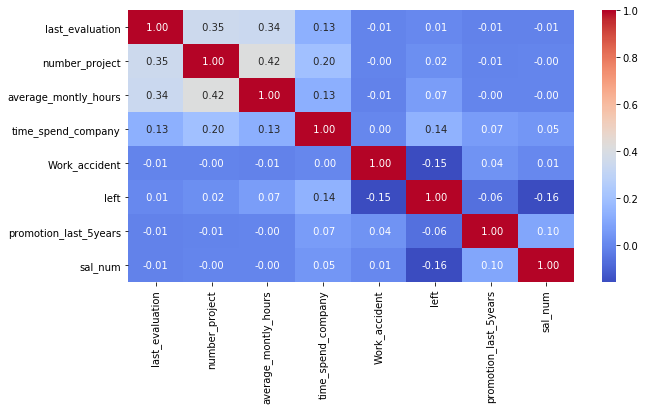

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')

In [40]:
df = pd.concat([df, pd.get_dummies(df['sales'],prefix='sl', prefix_sep='_')], axis=1)
df.drop('sales', inplace=True, axis=1)

In [41]:
y = df.left.values
df.drop('left', inplace=True, axis=1)

Based on what we visualized above, we will bin some of the fields to remove non-linearity

In [36]:
df_NK = df.copy()

bins = [0, 0.11, 0.35, 0.46, 0.71, 0.92,1.0]
df_NK['satisfaction_level_bin'] = pd.cut(df_NK.satisfaction_level,bins)

bins = [0, 0.47, 0.48, 0.65, 0.88, 0.89,1.0]
df_NK['last_evaluation_bin'] = pd.cut(df_NK.last_evaluation,bins)

lkup = { 3: "low", 4 : "medium", 5 : "medium",  2: "high", 6: "high", 7: "Very high"}
df_NK['number_project_cat'] = df_NK['number_project'].map(lkup)

bins = [96, 131, 165, 178, 179, 259, 287]
df_NK['average_montly_hours_bin'] = pd.cut(df_NK.average_montly_hours,bins)

lkup = { 2: "low", 3 : "medium", 4 : "medium", 6 : "medium", 5: "high", 7: "very low", 8: "very low", 10: "very low"}
df_NK['time_spend_company_cat'] = df_NK['time_spend_company'].map(lkup)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['satisfaction_level_bin'],prefix='sts', prefix_sep='_')], axis=1)
df_NK.drop('satisfaction_level', inplace=True, axis=1)
df_NK.drop('satisfaction_level_bin', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['last_evaluation_bin'],prefix='le', prefix_sep='_')], axis=1)
df_NK.drop('last_evaluation_bin', inplace=True, axis=1)
df_NK.drop('last_evaluation', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['number_project_cat'],prefix='np', prefix_sep='_')], axis=1)
df_NK.drop('number_project_cat', inplace=True, axis=1)
df_NK.drop('number_project', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['average_montly_hours_bin'],prefix='am', prefix_sep='_')], axis=1)
df_NK.drop('average_montly_hours_bin', inplace=True, axis=1)
df_NK.drop('average_montly_hours', inplace=True, axis=1)

df_NK = pd.concat([df_NK, pd.get_dummies(df_NK['time_spend_company_cat'],prefix='tsc', prefix_sep='_')], axis=1)
df_NK.drop('time_spend_company_cat', inplace=True, axis=1)
df_NK.drop('time_spend_company', inplace=True, axis=1)

df_NK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 39 columns):
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
sal_num                  14999 non-null int64
sl_IT                    14999 non-null uint8
sl_RandD                 14999 non-null uint8
sl_accounting            14999 non-null uint8
sl_hr                    14999 non-null uint8
sl_management            14999 non-null uint8
sl_marketing             14999 non-null uint8
sl_product_mng           14999 non-null uint8
sl_sales                 14999 non-null uint8
sl_support               14999 non-null uint8
sl_technical             14999 non-null uint8
sts_(0.0, 0.11]          14999 non-null uint8
sts_(0.11, 0.35]         14999 non-null uint8
sts_(0.35, 0.46]         14999 non-null uint8
sts_(0.46, 0.71]         14999 non-null uint8
sts_(0.71, 0.92]         14999 non-null uint8
sts_(0.92, 1.0]          14999 non-null uint8
le_(0.0, 0.47]   

In [37]:
# Split into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3183  248]
 [ 676  393]]
             precision    recall  f1-score   support

          0       0.82      0.93      0.87      3431
          1       0.61      0.37      0.46      1069

avg / total       0.77      0.79      0.77      4500



Logistic regression performs poorly on the original data, now we will train a logistic model on the feature engineered data.

In [39]:
# Split into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_NK, y, test_size=0.30, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=0.50)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3324  107]
 [ 136  933]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      3431
          1       0.90      0.87      0.88      1069

avg / total       0.95      0.95      0.95      4500



There is a considerable improvement in the F1 score, so the feature engineering really helped

We will transform the data using the polynomialfeatures and see whether the accuracy improve

In [42]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(2)

In [43]:
# Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(pol.fit_transform(df_NK.as_matrix()), y, test_size=0.30, random_state=101)

C:\Users\o38528\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=0.5)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3384   47]
 [  98  971]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3431
          1       0.95      0.91      0.93      1069

avg / total       0.97      0.97      0.97      4500



Definite improvement! Ideally we should not include the test data in the visualization

Since the data is non-linear, algorithms like random forest and KNN would outperform logistic regression here. Our feature engineering reduced the non-linearity to an extend but not enough to outperform a non-linear algorithm.

Now let's see whether we can reduce the input dimension using PCA

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_PCA= sc.fit_transform(df_NK)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_PCA, y, test_size=0.30, random_state=101)

In [47]:
from sklearn.decomposition import PCA
pca_comp = 2
pca = PCA(n_components=pca_comp)
#pca = PCA(n_components=df_NK.shape[1])
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
#pca_mat = pd.DataFrame(pca.components_.T, columns=['PC' + str(i) for i in range(1,df_NK.shape[1]+1) ], index=df_NK.columns)
pca_mat = pd.DataFrame(pca.components_.T, columns=['PC' + str(i) for i in range(1,pca_comp+1) ], index=df_NK.columns)

In [49]:
#pca_mat = pca_mat*pca.explained_variance_ratio_
pca_mat= pca_mat.abs()

In [9]:
a=np.arange(6) 

In [10]:
print(a)

[0 1 2 3 4 5]


In [13]:
import sklearn.preprocessing

In [5]:
soup.Contents

NameError: name 'soup' is not defined

In [9]:
import 
for link in soup.find_all('a'):
    print(link.get('href'))

ModuleNotFoundError: No module named 'soup'

In [10]:
soup = BeautifulSoup(open("index.html")) 
soup = BeautifulSoup("<html>data</html>")

NameError: name 'BeautifulSoup' is not defined

In [11]:
for child in head_tag.descendants: 
    print(child)

NameError: name 'head_tag' is not defined

In [15]:
np.unique(df.target)

AttributeError: 'DataFrame' object has no attribute 'target'